# Imports


In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os, sys
os.chdir("../")

# Settings


In [4]:
img_name = "tony.jpg"
image_path = f"runs/original/{img_name}"
output_dir = "runs/masks"
attr = "glasses"
output_path = f"{output_dir}/{attr}"
os.makedirs(output_path, exist_ok=True)

# Mask Generation

In [5]:
def make_rec_mask(horbd, verbd, size):
    l, r = horbd
    t, b = verbd
    mask = np.zeros(size)
    mask[t:b, l:r] = 1
    return mask

def overlay_mask(img, mask):
    assert img.shape == mask.shape
    return (img*(1-mask)).astype(np.uint8)

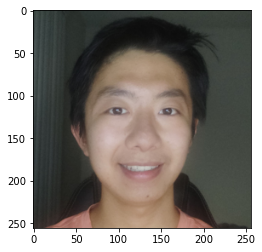

In [7]:
img = np.array(Image.open(image_path).resize((256, 256)))
plt.figure()
plt.imshow(img)

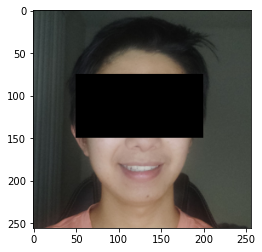

In [9]:
left = 50
right = 200
top = 75
bottom = 150
size = img.shape
mask = make_rec_mask((left, right), (top, bottom), size)
dis = overlay_mask(img, mask)
plt.figure()
plt.imshow(dis)

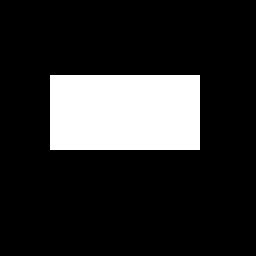

In [10]:
m_img = Image.fromarray((mask[:, :, 0]*255).astype(np.uint8))
m_img.show()
m_img.save(os.path.join(output_path, img_name))